In [15]:
#import data package
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("cleaned_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73320 entries, 0 to 73319
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                73320 non-null  int64  
 1   Position                  73320 non-null  int64  
 2   ActWeightIncr             73320 non-null  int64  
 3   HorseWeight               73320 non-null  int64  
 4   GatePosition              73320 non-null  float64
 5   WinningMargin             73320 non-null  float64
 6   WinOdds                   73320 non-null  float64
 7   Contenders                73320 non-null  int64  
 8   Distance                  73320 non-null  int64  
 9   PrizeMoney                73320 non-null  int64  
 10  Rating                    73320 non-null  int64  
 11  Gold                      73320 non-null  int64  
 12  Silver                    73320 non-null  int64  
 13  Bronze                    73320 non-null  int64  
 14  TotalM

In [3]:
X = df[['ActWeightIncr',
       'HorseWeight', 'GatePosition',
       'Contenders', 'Distance',
       'Rating', 'Gold', 'Silver', 'Bronze', 'TotalMatches', 'CourseState_Firm', 'CourseState_Good',
       'CourseState_Good2Firm', 'CourseState_Good2Yield',
       'CourseState_WetFast', 'CourseState_WetSlow', 'CourseState_Yield',
       'Course_AllWeather', 'Course_TurfA', 'Course_TurfA3', 'Course_TurfB',
       'Course_TurfB2', 'Course_TurfC', 'Course_TurfC3',
       'BirthPlace_Argentina', 'BirthPlace_Australia', 'BirthPlace_Brazil',
       'BirthPlace_Canada', 'BirthPlace_Chile', 'BirthPlace_France',
       'BirthPlace_Germany', 'BirthPlace_Greece', 'BirthPlace_Ireland',
       'BirthPlace_Italy', 'BirthPlace_Japan', 'BirthPlace_NewZealand',
       'BirthPlace_SouthAfrica', 'BirthPlace_Spain',
       'BirthPlace_UnitedKingdom', 'BirthPlace_UnitedStates']]
y = df['Position']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

# prevent "Invalid classes inferred from unique values" error
le = LabelEncoder()
y_train = le.fit_transform(y_train)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [4]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

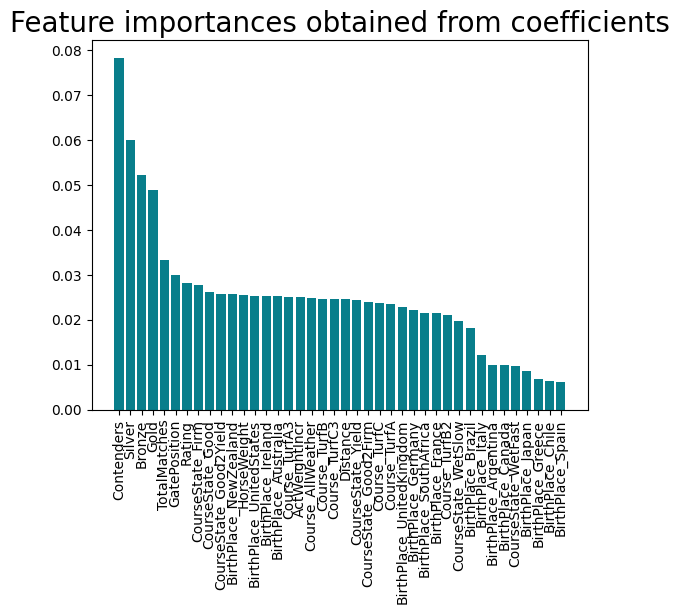

In [5]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_
})
importances = importances.sort_values(by='Importance', ascending=False)
coeff_df_lm = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df_lm

,Coefficient
ActWeightIncr,-1.877899e-01
HorseWeight,9.375146e-02
GatePosition,4.773376e-01
Contenders,3.562880e-01
Distance,3.574506e-03
Rating,-4.335580e-01
Gold,-3.020666e-01
Silver,-4.775816e-01
Bronze,-4.205674e-01
TotalMatches,3.550755e-01


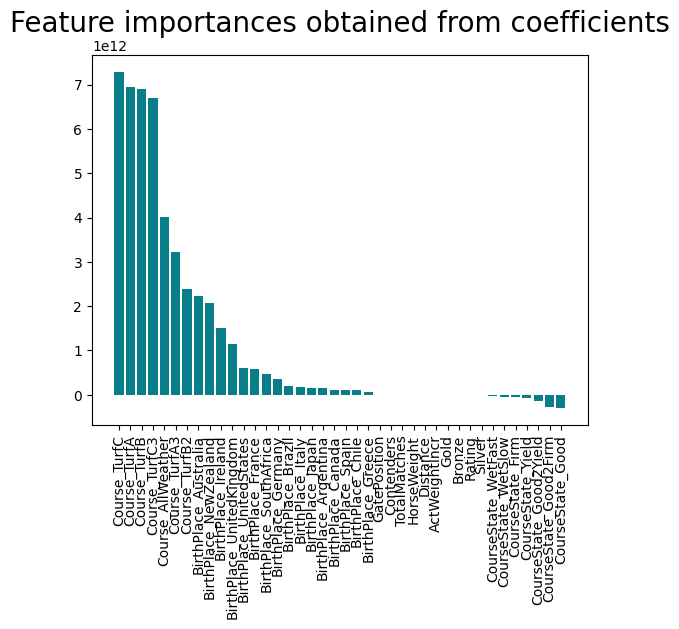

In [7]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [11]:
predictions = model.predict(X_test)

c:\Users\Chan\Desktop\Projects\horse-racing-prediction\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


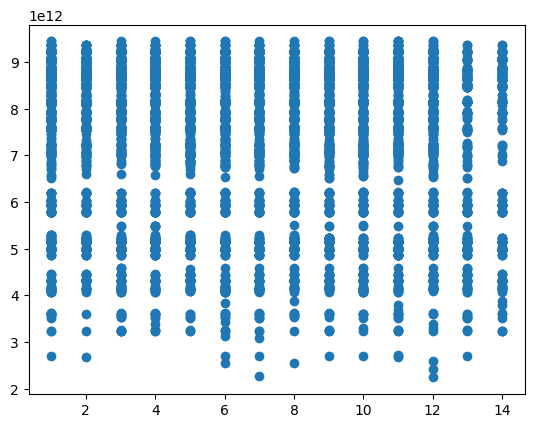

In [12]:
plt.scatter(y_test,predictions)

In [13]:
y_lm_test1=y_test.to_frame()
y_lm_test1['Predictions']=predictions
y_lm_test1.head()

,Position,Predictions
64955,6,8.828073e+12
22015,5,8.828073e+12
18081,10,8.625519e+12
42951,6,7.551784e+12
36741,3,8.859501e+12


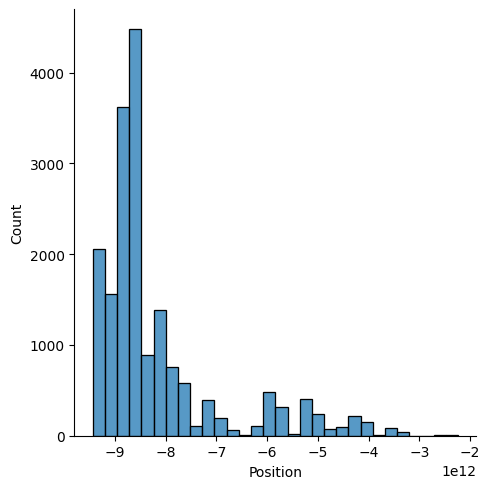

In [16]:
sns.displot((y_test-predictions),bins=30)

In [18]:
y_lm_test1['Error']=y_lm_test1['Predictions']-y_lm_test1['Position']
y_lm_test1.head()

,Position,Predictions,Error
64955,6,8.828073e+12,8.828073e+12
22015,5,8.828073e+12,8.828073e+12
18081,10,8.625519e+12,8.625519e+12
42951,6,7.551784e+12,7.551784e+12
36741,3,8.859501e+12,8.859501e+12
